In [6]:
from plotting import planet_marker, timeline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('paper')

Read in the data.

In [7]:
solarsystem = np.loadtxt('solarsystemplanets.txt')
exoplanets = np.loadtxt('exoplanets.txt')

Define the number of frames we want, and what year each frame represents.

In [8]:
frames = 500
years = np.linspace(exoplanets[:, 2].min() - 1.1,
                    exoplanets[:, 2].max() + 1.1,
                    frames) 
years = np.where(years > 2021, 2021, years)

planet_markers = [planet_marker(*planet) for planet in exoplanets]
for pm in planet_markers:
    pm._marker_color = 'silver'
year_markers = timeline(years)

In [9]:
def gentrify_plot(ax):
    """Gentrification of the plot."""
    ax.set_xlabel(r'${\bf Orbital \,\, Semi-Major \,\, Axis} \quad ({\rm au})$')
    ax.set_ylabel(r'${\bf Planetary \,\, Mass} \quad ({\rm M_{Jup}})$')
    ax.set_xlim(2e-3, 5e3)
    ax.set_ylim(2e-5, 5e2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=False, top=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)    
    ax.grid(alpha=0.2, lw=0.5, ls='--')

In [10]:
# cycle through each frame and draw the figure.
for y, year in enumerate(years):
    
    # make the axes grid
    fig, axs = plt.subplots(nrows=2, figsize=(6, 3), constrained_layout=True,
                            gridspec_kw=dict(height_ratios=[1, 8]))

    # add the timeline on top
    year_markers.plot_year_marker(axs[0], year if year >= exoplanets[:, 2].min() - 1.0 else None)
    
    # include the planets
    ax = axs[1]
    for planet in planet_markers:
        planet.plot_marker(ax, year)
    gentrify_plot(ax)
    
    # add the solar system planets
    ax.scatter(solarsystem[:, 1], solarsystem[:, 0], marker='s',
               color='gold', lw=0.0, s=15, zorder=500)

    # save it
    plt.savefig('frames/exoplanet_population_{:03d}.png'.format(y))
    plt.close()

In [11]:
!convert frames/*.png -compress None -quality 100  exopopulation.mpeg

In [12]:
!convert -delay 4.167 frames/*.png -loop 0 -scale 50% exopopulation.gif

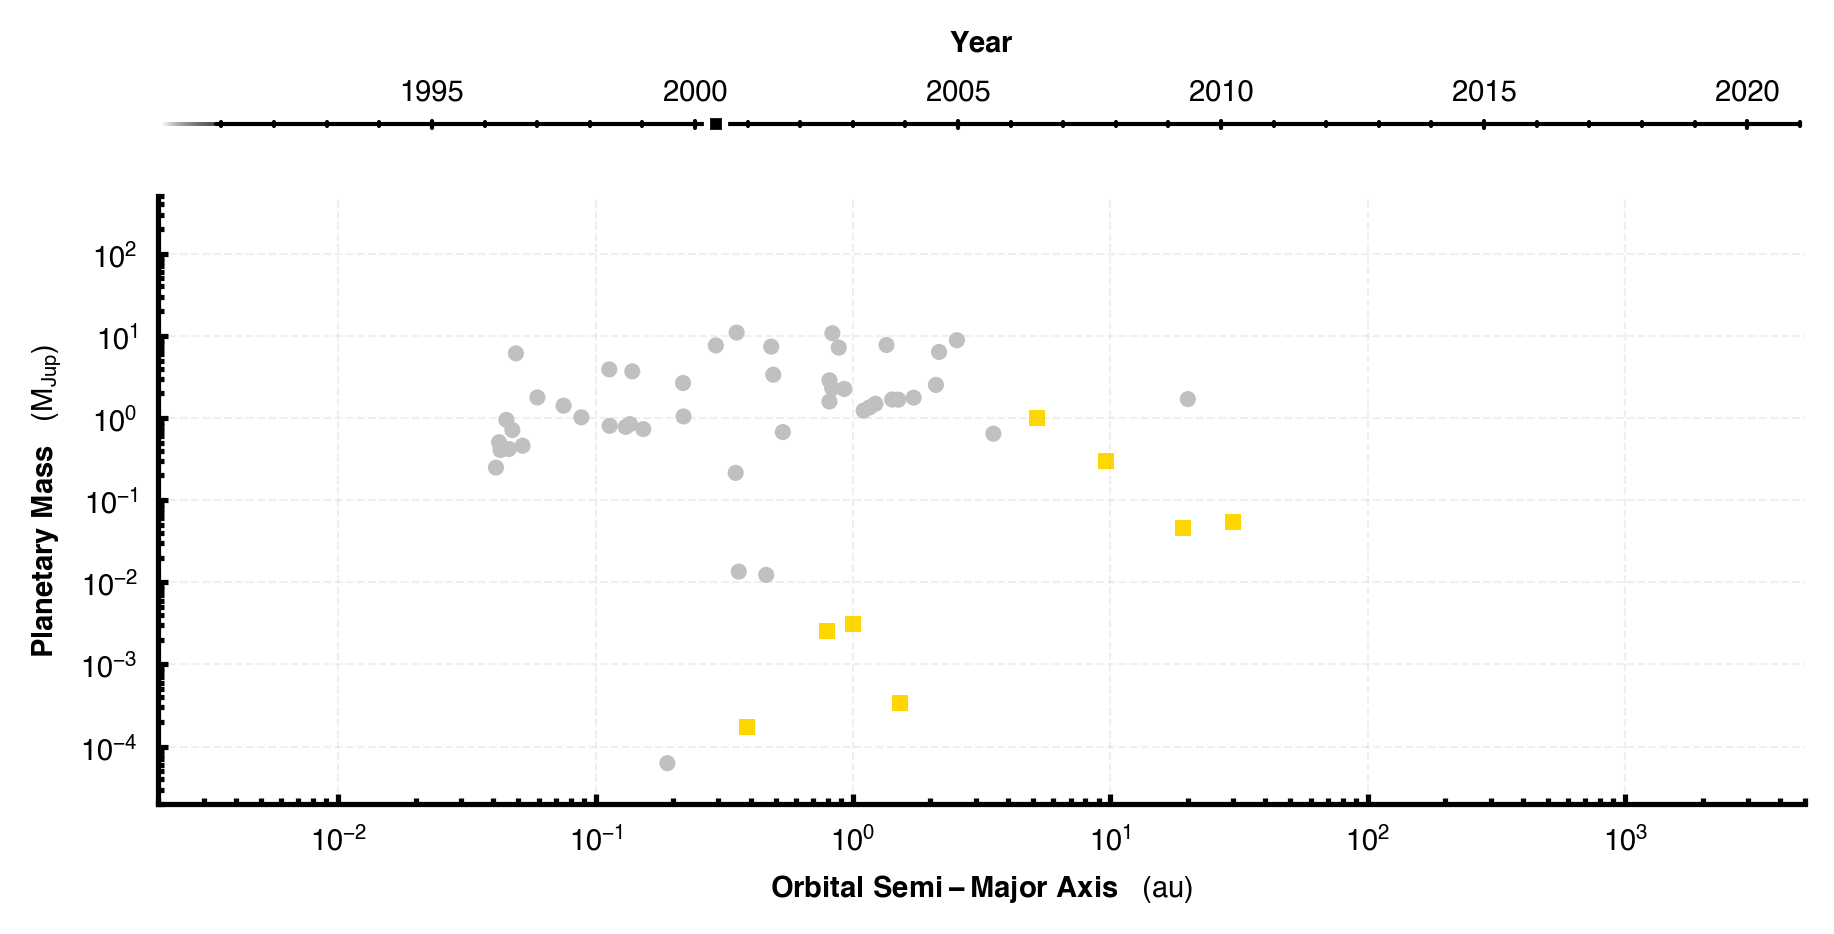

In [18]:
year = 2000.4
planet_markers = [planet_marker(*planet, fade_marker=0, fade_outline=0) for planet in exoplanets]
for pm in planet_markers:
    pm._marker_color = 'silver'

# make the figure
fig, axs = plt.subplots(nrows=2, figsize=(6, 3), constrained_layout=True,
                        gridspec_kw=dict(height_ratios=[1, 8]))

# gentrify
gentrify_plot(axs[1])

# add the timeline on top
year_markers.plot_year_marker(axs[0], year)

# include the planets
ax = axs[1]
for planet in planet_markers:
    planet.plot_marker(ax, year)
    
# add the solar system planets
ax.scatter(solarsystem[:, 1], solarsystem[:, 0], marker='s',
           color='gold', lw=0.0, s=15)
